In [32]:
from shutil import copyfile

# copying the test database (this is just for repeated testing)
src = 'C:/Users/Owen/Documents/Academic/CNERG/cycsat/simulations/four_reactors.sqlite'
dst = 'C:/Users/Owen/Documents/Academic/CNERG/cycsat/reactor_test_sample.sqlite'
copyfile(src, dst)

'C:/Users/Owen/Documents/Academic/CNERG/cycsat/reactor_test_sample.sqlite'

## import key libraries

In [33]:
from cycsat.simulation import Simulator
%matplotlib inline

## define the facilities

In [34]:
# this loads a cyclus simulation
sim = Simulator('reactor_test_sample.sqlite')

## build and plot facilities using a templete

In [35]:
from cycsat.prototypes.ByronIL import ByronIL

temps = {'Reactor1': ByronIL,
         'Reactor2': ByronIL}

sim.build(name='test_build',templates=temps)

sim.Facility()

,id,AgentId,name,maxx,maxy,defined,prototype,template,build_id,obj
0,1,19,"Byron, IL",7000,7000,True,Reactor1,ByronIL,1,<cycsat.prototypes.ByronIL.ByronIL object at 0...
1,2,20,"Byron, IL",7000,7000,True,Reactor2,ByronIL,1,<cycsat.prototypes.ByronIL.ByronIL object at 0...


(<matplotlib.figure.Figure at 0x2385670abe0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023856715438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000023856779400>], dtype=object))

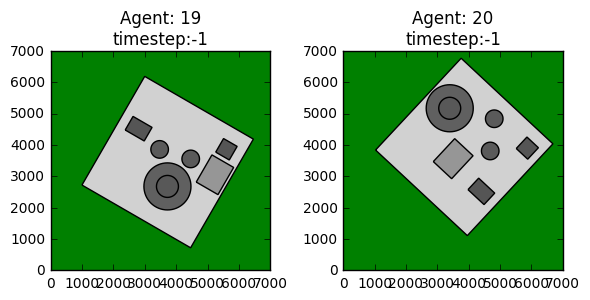

In [36]:
# plot a single facility with pandas
sim.plot()

(<matplotlib.figure.Figure at 0x23856199438>,
 <matplotlib.axes._subplots.AxesSubplot at 0x238561cc390>)

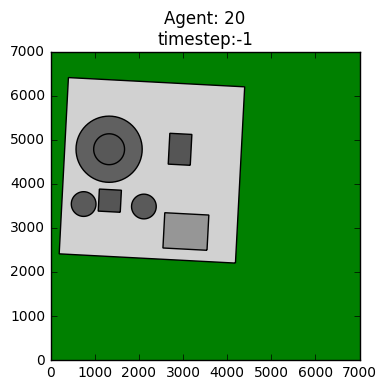

In [21]:
# plot mulitple facilities with a sql query
sim.plot(sql='AgentId > 19')

In [15]:
# look at the different builds
sim.Build()

,id,name,obj
0,1,test_build,<cycsat.archetypes.Build object at 0x000002385...


## run the simulation and plot gifs

In [10]:
sim.simulate(1)

## export satellite images (in development)